<a href="https://colab.research.google.com/github/syp2889/python25study/blob/main/07_03_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC(%EB%93%9C%EB%A1%AD%EC%95%84%EC%9B%83%2C%EC%BD%9C%EB%B0%B1%2C%EC%A1%B0%EA%B8%B0%EC%A2%85%EB%A3%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 인공신경망을 구성하는 절차
# 1. 더미데이터 준비
# 2. 훈련용, 검증용, 테스트용으로 나눔
# 3. 심층을 만듬(dense)
# 4. model에 적용
# 5. 컴파일 진행(최적화기법을 적용: adam)
# 6. fit(훈련)
# 7. evaluate(검증)

In [ ]:
# 손실곡선 : fit() 메서드로 모델을 훈련하는 동안 훈련과정이
# 상세하게 출력되어 확인 할 수 있다. (에포크 횟수별로 손실률 과 정확도를 보게 됨.)
# 아래쪽에 이 출력 메시지가 나옴
# 코랩 노트북에 코드셀은 print()명령어를 사용하지 않아도 마지막 라인에 실행결과를 자동으로 출력)

# 다시말해, fit() 메서드는 History 라는 클래스 객체를 반환 함(훈련과정의 지표, 손실, 정확도 등 내장)
# 이 값을 잘 활용하면 그래프를 그릴 수 있다.

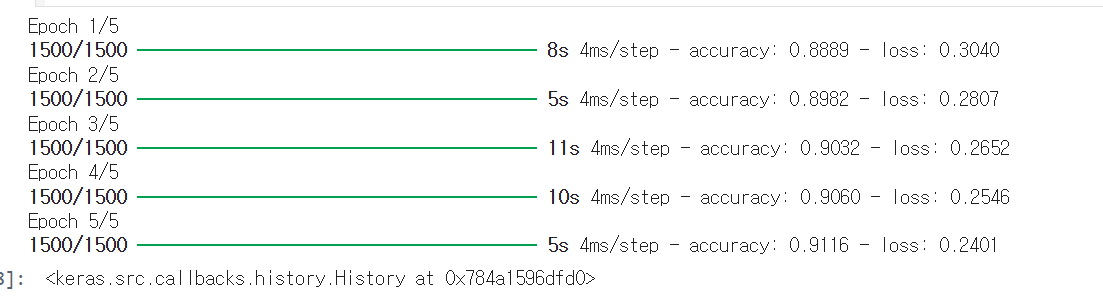

이런 식으로 나옴


In [3]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target),(test_input, test_target)=\
keras.datasets.fashion_mnist.load_data()
# 엔터효과 제거용 \ >>> 한줄로 긴 문장을 자름

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
print("훈련데이터 : ")
print(train_scaled.shape, train_target.shape)
print("테스트데이터 : ")
print(test_input.shape, test_target.shape)
print("검증데이터 : ")
print(val_scaled.shape, val_target.shape)

훈련데이터 : 
(48000, 28, 28) (48000,)
테스트데이터 : 
(10000, 28, 28) (10000,)
검증데이터 : 
(12000, 28, 28) (12000,)


In [6]:
# 모델을 만드는 함수를 정의 함(하나의 매개변수를 받아 리턴) .model_fn(dense 추가하면 생성)
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))    # 반복적으로 사용되는 입력 층
  model.add(keras.layers.Dense(100, activation='relu'))   # 반복적으로 사용되는 2진분류 층
  # model_fn()함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 하나의 층을 추가함
  if a_layer:
    model.add(a_layer)                                    # 매개값으로 넘어오는 추가되는 층

  model.add(keras.layers.Dense(10,activation='softmax'))  # 반복적으로 사용되는 다중분류 층
  return model

In [7]:
model = model_fn() # 위에서 만든 메서드 호출 하여 모델에 담음
#       model_fn(매개값이 없으면 그냥 생성, 매개값이 있으면 모델추가용)
model.summary()    # 모델의 요약정보

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#                   다중분류                                    정확도

In [9]:
# fit() 메서드 결과를 history 변수에 담아 봄 (어제거에서 추가된 내용)
history = model.fit(train_scaled, train_target, epochs=5, verbose=2) # 26초 걸림
#                                                         훈련과정 출력을 조절 함
#                                                         verbose=0 : 훈련과정을 나타내지 않음
#                                                         verbose=1 : 기본값, 에포크마다 진행 막대와 함께 손실 등의 지표가 출력
#                                                         verbose=2 : 진행막대 빼고 출력

Epoch 1/5
1500/1500 - 5s - 4ms/step - accuracy: 0.8112 - loss: 0.5311
Epoch 2/5
1500/1500 - 4s - 3ms/step - accuracy: 0.8586 - loss: 0.3903
Epoch 3/5
1500/1500 - 5s - 3ms/step - accuracy: 0.8729 - loss: 0.3523
Epoch 4/5
1500/1500 - 11s - 7ms/step - accuracy: 0.8810 - loss: 0.3306
Epoch 5/5
1500/1500 - 5s - 3ms/step - accuracy: 0.8873 - loss: 0.3141


In [10]:
print(history)  # 위에 fit한 결과를 History 객체가 가지고 있는데 이것을 history 변수에 담음

In [11]:
print(history.history.keys())
# 훈련 측정 값이 담겨 있는 history 딕셔너리가 존재함
# 정확도 accuracy, 손실 loss값이 있어요

# 정확도는 compile()메서드의 metrics 매개변수에 accuracy를 추가 했기 때문에
# history 속성이 포함되었어요

dict_keys(['accuracy', 'loss'])


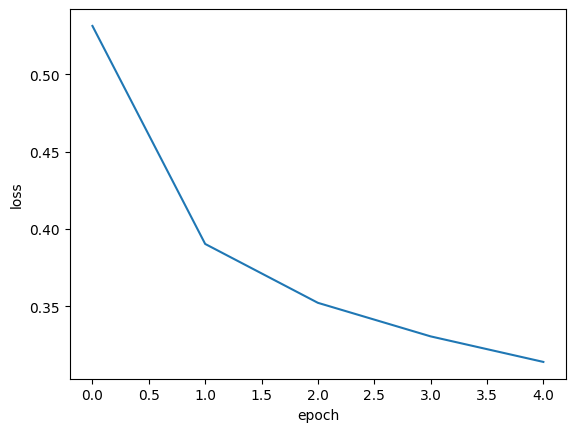

In [12]:
import matplotlib.pyplot as plt
# history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이
# 순서대로 나열된 단순한 리스트로 맷플롯립으로 쉽게 그래프 처리가 가능해요.
plt.plot(history.history['loss'])  # 손실률을 차트로 표시
plt.xlabel('epoch')
# 파이썬 인덱스는 0부터 시작하기 때문에 5개의 에포크가 0~4까지 x 축에 표현돼요
plt.ylabel('loss')
plt.show()

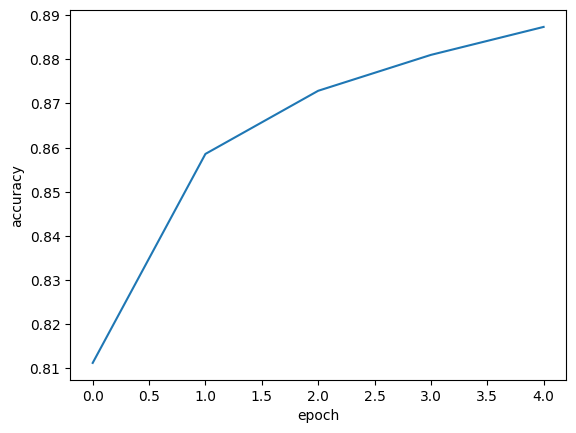

In [14]:
# 이번엔 정확도를 출력해볼게요
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 결과분석 : 에포크마다 손실이 감소하고 정확도가 향상해요

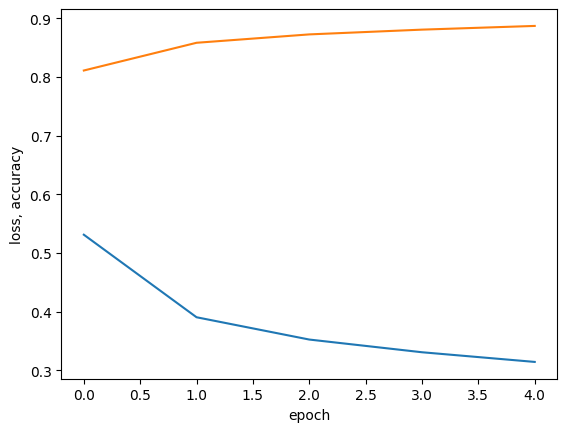

In [15]:
plt.plot(history.history['loss'])     # 손실률
plt.plot(history.history['accuracy']) # 정확도
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.show()

In [16]:
# 이번엔 에포크 횟수를 20번으로 늘려서 보자.

model = model_fn() # 위에서 만든 메서드로 모델 생성(3개층 입력층, 은닉층, 출력층)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0) # 1분정도 걸려요

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


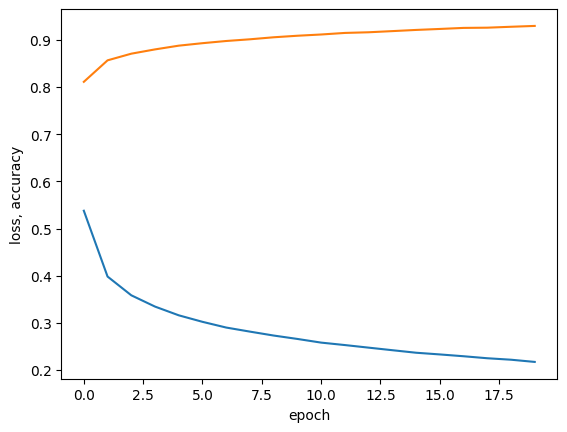

In [17]:
plt.plot(history.history['loss'])   # 손실율
plt.plot(history.history['accuracy']) # 정확도
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.show()

In [18]:
# 검증 손실 validation_data=(val_scaled, val_target)
# 예전에 확률적 경사 하강법을 사용 했을 때 과대/과소 적합과 에포크 사이에 관계 부분이 있었죠
# 인공 신경망은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 여기에도 적용돼요

# 에포크에 따른 과대적합, 과소적합을 파악하려면 훈련 세트 점수와 검증 세트에 대한 점수도 필요해요
# 그래서 위에처럼 훈련세트에 손실과 정확도만 그리면 파악이 어려워요
# 검증 손실을 이용해서 과대/과소 적합을 응용할게요

# keypoint : https://wikidocs.net/236194
# 손실을 사용하는 것과 정확도를 사용하는 것의 차이는?
# 인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수에요
# 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있는데
# 모델이 잘 훈련 되었는지 판단 하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 좋은 방법이죠

In [19]:
model = model_fn()
model.summary()
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target))
#                                                                     검증손실을 구하기 위한 매개값 추가 됨 3분걸림

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7609 - loss: 0.6817 - val_accuracy: 0.8484 - val_loss: 0.4271
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8512 - loss: 0.4081 - val_accuracy: 0.8586 - val_loss: 0.3910
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8686 - loss: 0.3628 - val_accuracy: 0.8598 - val_loss: 0.3859
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8755 - loss: 0.3391 - val_accuracy: 0.8621 - val_loss: 0.3755
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8849 - loss: 0.3211 - val_accuracy: 0.8603 - val_loss: 0.3916
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8915 - loss: 0.3082 - val_accuracy: 0.8658 - val_loss: 0.3957
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8952 - loss: 0.2964 - val_accuracy: 0.8652 - val_loss: 0.3949
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8999 - loss: 0.2868 - 

In [20]:
print(history.history.keys())
# 정확도 accuracy, 손실 loss 값이 있어요
# 추가로 검증세트, 정확도 val_accuracy, 검증세트 손실 val_loss가 나오네요

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


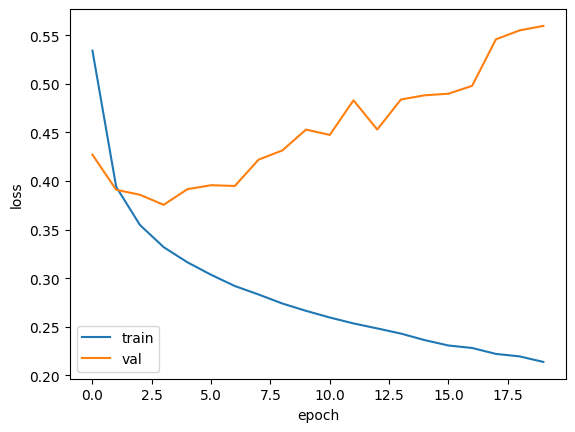

In [22]:
# 과대/과소적합 문제를 조사하기 위해 훈련손실, 검증손실을 한 그래프에 그려서 비교해볼게요.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 결과 분석 : 초기에 검증 손실이 감소하다가 다섯 번째 에포크 만에 다시 상승했네요
# 훈련 손실은 꾸준히 감소하기 때문에 과대적합 모델이 만들어졌어요
# 검증손실이 상승하는 시점을 가능한 늦추면 세트에 대한 손실이 줄어들고
# 검증 세트에 대한 정확도가 증가할 것 같네요

# 과대적합을 막기 위한 방법으로 예전에 사용했던 규제방식 대신에
# 신경망에 특화된 규제방법(드롭아웃)을 나중에 해봅시다.

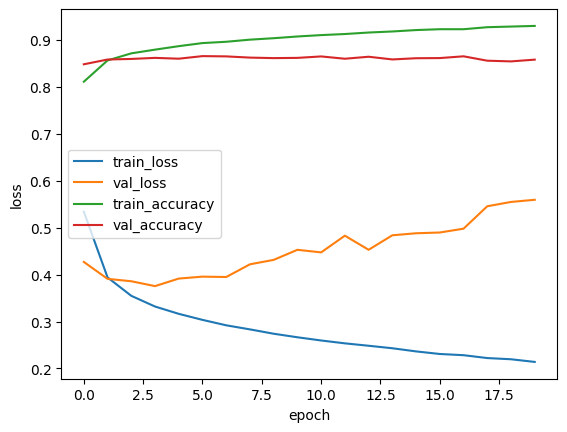

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()

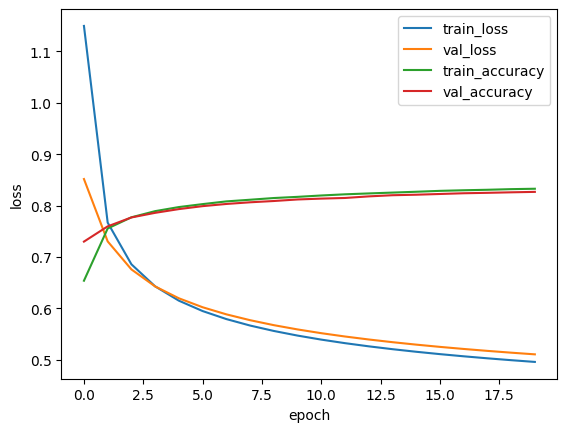

In [25]:
model = model_fn()

adagrad=keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()
#

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


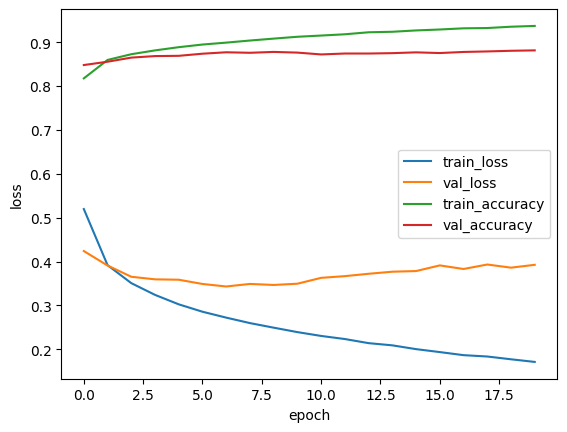

In [26]:
model =model_fn()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target)) # 2분 25초 걸림

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()
# 3가지의 최적화 기법을 사용해보니 adam이 안정적으로 보이네요
# 대신 과대적합을 막기 위한 기법이 필요해 보여요

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


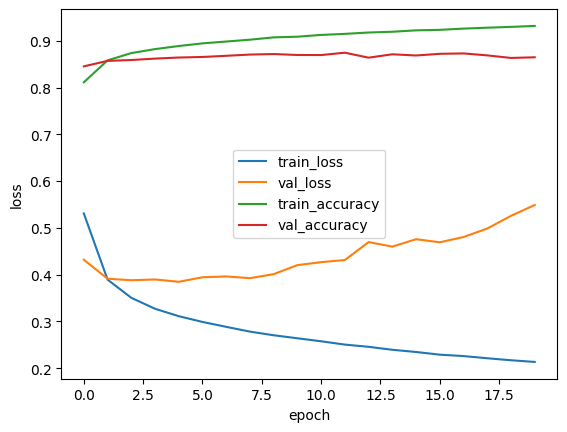

In [27]:
model = model_fn()

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target)) # 1분 25초 걸림

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()
# 3가지의 최적화 기법을 사용해보니 adam이 안정적으로 보이네요
# 대신 과대적합을 막기 위한 기법이 필요해 보여요

In [ ]:
# 드롭 아웃 (Dropout) 은 딥러닝의 기초가 되는 제프리 힌턴이 소개 했어요
# 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (뉴런 출력을 0으로 만듬) 과대적합을 막아요

# 어떤 샘플을 처리할 때 은닉층의 두번째 뉴런이 드롭아웃되어 h2출력이 없어요
# 다른 샘플을 처리 할 때는 은닉츠으이 첫번째 뉴런이 드롭아웃되어 h1출력이 없어요
# 뉴런은 랜덤하게 드롭아웃 되고 얼마나 많은 뉴런을 드롭할지 우리가 하이퍼파라미터에 정할거에요.

# 드롭아웃이 왜 과대적합을 막을 수 있을지 생각을 해보면 이전 층의 일부 뉴런이 랜덤하게 꺼지면
# 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 해요
# 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있는거에요.

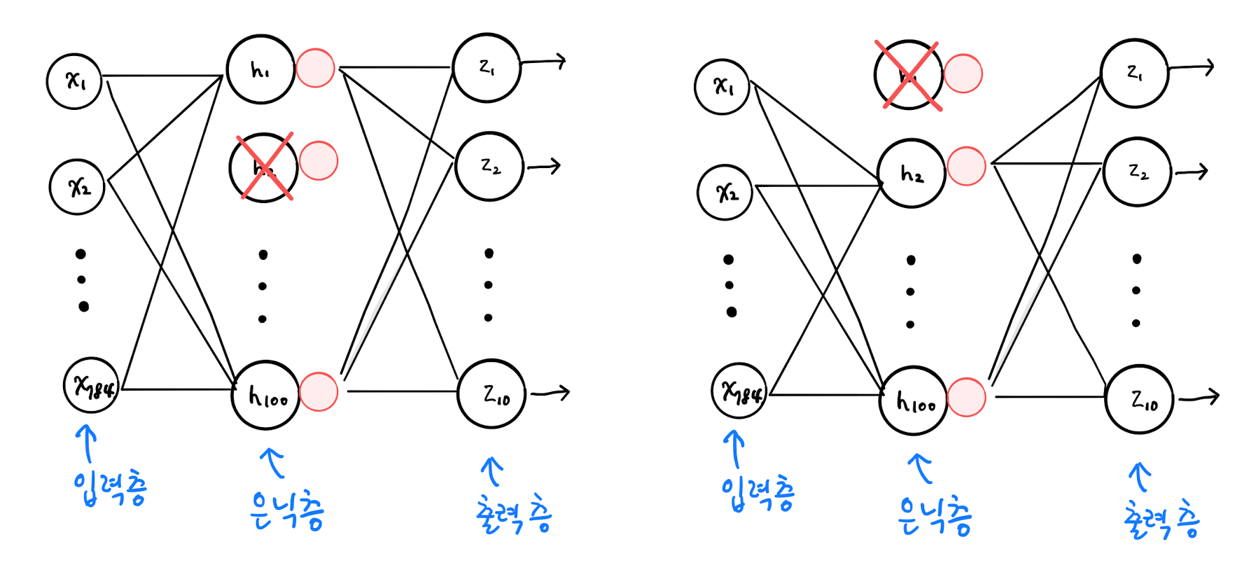

In [28]:
# 또 다른 분석
# 앞의 드롭아웃이 적용된 2개의 신경망 그림을 보면
# 드롭아웃을 적용해 훈련한느 것은 마치 2개의 신경망을 앙상블하는 것 처럼 상상하게 돼요
# 앙상블 : 다 좋은 예측을 만들기 위해 여러개의 모델을 훈련하는 머신러닝 알고리즘
# 과대적합을 막아주는 좋은 기법

# 케라스에서 드롭아웃을 keras.layers.Dropout 으로 제공해요
# 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만듬
# 드롭아웃이 층처럼 사용되지만 훈련되는 파라미터는 없어요

# model_fn 함숭 ㅔ드롭 아웃 객체를 전달하여 층을 추가해요
model = model_fn(keras.layers.Dropout(0.3)) # 30% 정도 드롭아웃

model.summary() # 요약 확인
# 은닉층 뒤에 추가된 드롭아웃 층 (3번째값) 은 훈련되는 모델 파라미터가 없음
# 입력과 출력의 크기가 같음
# 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않음


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

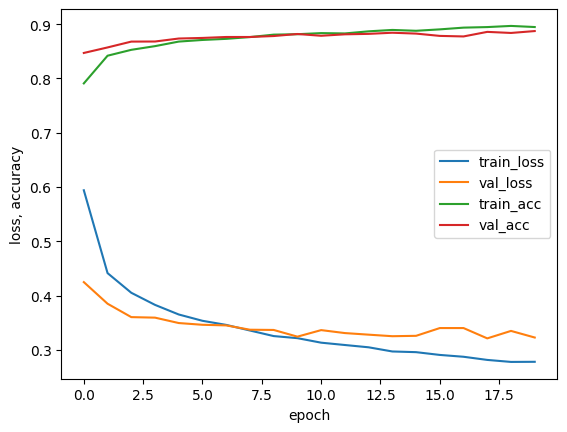

In [29]:
# 주의사항 : 훈련이 끝난 뒤 평가는 에측을 수행할 때는 드롭아웃을 적용하지 않는다.
# 훈련된 모든 뉴런을 사용해야 올바른 예측이 수행됨.
# 텐서플로와 케라스는 모델을 평과와 에측에 사용할 때 자동으로 드롭아웃을 적용하지 않음

# 훈련손실과 검증손실의 그래프를 그려보자.
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['train_loss','val_loss','train_acc','val_acc'])
plt.show()
# 과대적합이 확실히 줄어들었네요. 10번째 에포크가 검증 손실의 감소가 멈추지만 크게 상승하지 않음
# 20번의 에포크를 실행해서 결국 과대 적합이 되었음 -> 10번만 해보까??? (조기종료에서 해보자.)


In [41]:
# 차후에 재활용하기 위해 모델 저장과 복원도 해봅시다

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

model.save('model-whole-ep10.keras') # 모델 저장

# 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights() 메서드가 있어요
# 텐서플로의 체크포인트 포멧으로 저장하지만 https://www.tensorflow.org/guide/checkpoint?hl=ko
# .h5일 경우 HDF5 포멧으로 저장해요 https://geunuk.tistory.com/466

model.save_weights('model-ep10.weights.h5') # HDF5 형식으로도 저장됨 (폴더에서 확인)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
# 이제는 저장한 모델을 불러와 테스트를 진행하봅시다.
!ls -al model*

-rw-r--r-- 1 root root 976600 Nov 13 04:03  model-ep10.weights.h5
-rw-r--r-- 1 root root 979412 Nov 13 04:03  model-whole-ep10.keras
-rw-r--r-- 1 root root 979409 Nov 13 03:48 'model=whole-ep10.keras'


In [43]:
# 실험1
# 훈련하지 않은 새로운 모델을 만들고 model-ep10.weights.h5 파일에서
# 훈련된 모델 파라미터를 읽어서 사용합니다.

# model_fn() 위와 동일한 모델
model = model_fn(keras.layers.Dropout(0.3)) # 훈련하지 않은 새로운 모델

model.load_weights('model-ep10.weights.h5') # 이전에 저장했던 모델 파라미터를 로딩
# 이때 사용하는 메서드는 save_weight()와 쌍을 이루는 load_weight() 메서드에요
# 주의사항 : load_weight() 메서드를 사용하려면 save_weight() 메서드로 저장했던 모델과
# 정확히 같은 구조를 가져야 해요

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# 모델의 검증 정확도를 확인해봅시다.
import numpy as np

# predict() 메서드는 사이킷 런과 다른 샘플마다 10개의 클래스에 대한 확률을 반환 (다중분류)

# 패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플수는 12,000개이기 때문에
# predict()메서드는 (12000, 10)크기의 배열을 반환
# 10개의 확률 중 가장 큰 값의 인덱스를 골라(.argmax) 타킷 레이블과 비교하여 정확도를 계산해보자
val_labels = np.argmax(model.predict(val_scaled), axis=-1)

# axis=-1 배열의 마지막 차원을 따라 최대값을 고름
# 검증세트는 2차원 배열이기 때문에 마지막 차원은 1이 됨
# 예를 들어 아래 그림처럼 5x3배열에 axis=1로 한값과 axis=0으로 한 값의 인덱스를 반환함

# argmax()로 고른 인덱스(val_labels)와 타킷(val_target)을 비교하여 같으면 1이되고 다르면 0이됨
# 이를 평균으로 출력해 봄(정확도)
print(np.mean(val_labels == val_target)) # 87.96% 평균

# axis=1 이면 열을 따라 각 행의 최대값의 인덱스를 선택하고
# axis=0 이면 행을 따라 각 열의 최대값의 인덱스를 선택함.
# 그 다음 라인은 argmax()로 고른 인덱스(val_labels)와 타킷(val_target)을 비교
#   -> 두 배열에서 각 위치의 값이 같이면 1, 다르면 0 (평균하면 정확도가 됨)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.8814166666666666


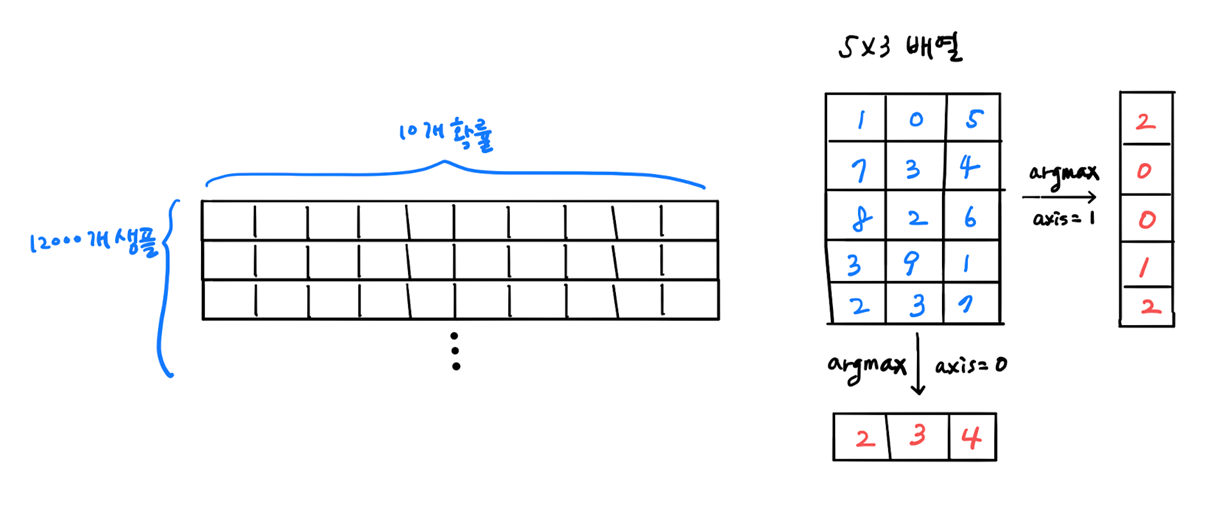

In [45]:
# 모델 전체를 파일에서 읽은 다음 검증세트의 정확도를 출력 해볼게요
model = keras.models.load_model('model-whole-ep10.keras') # load_model()저장된 케라스 파일 읽기

model.evaluate(val_scaled, val_target) # 같은 모델을 불러 들였기 때문에 위와 정확도가 같습니다

# 현 상태 분석 : 20번의 에포크 동안 모델을 훈련하여 검증 점수가 상승하는 지점을 확인
# 모델을 과대적합 되지 않은 에포크만큼 다시 훈련해요
# 모델을 두번씩 훈련하지 않고 한번에 끝내는 방법을 연구해봅시다. >>케라스 콜백

# https://ltlkodae.tistory.com/13 케라스 모델을 저장하는 방법 2가지 분석

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8831 - loss: 0.3222


[0.3244042992591858, 0.8814166784286499]

In [46]:
# 실험2
# 아예 파일로 새로운 모델을 만들고 바로 사용해봅시다.
# 추가적으로 콜백이라는 것을 활용해봅시다
# 콜백 : 훈련과정 중간에 어떤 작업을 수행할 수 있게 하는 객체, 케라스 ,콜백 패키지에 있어요
# fit() 메서드의 callback 매개변수에 리스트로 전달하여 사용합니다.
# 지금우리가 사용할 콜백은 ModelCheckpoint 콜백으로 에포크마다 모델을 저장해요
# save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있어요

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])
# 모델 훈련 후 best-model.keras에 최상의 검증 점수를 낸 모델이 저장돼요.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7247 - loss: 0.7953 - val_accuracy: 0.8435 - val_loss: 0.4327
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8372 - loss: 0.4597 - val_accuracy: 0.8627 - val_loss: 0.3819
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8474 - loss: 0.4169 - val_accuracy: 0.8647 - val_loss: 0.3691
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8559 - loss: 0.3936 - val_accuracy: 0.8670 - val_loss: 0.3616
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8627 - loss: 0.3764 - val_accuracy: 0.8700 - val_loss: 0.3581
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8646 - loss: 0.3660 - val_accuracy: 0.8762 - val_loss: 0.3448
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8725 - loss: 0.3490 - val_accuracy: 0.8756 - val_loss: 0.3375
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8751 - loss: 0.3451 - 

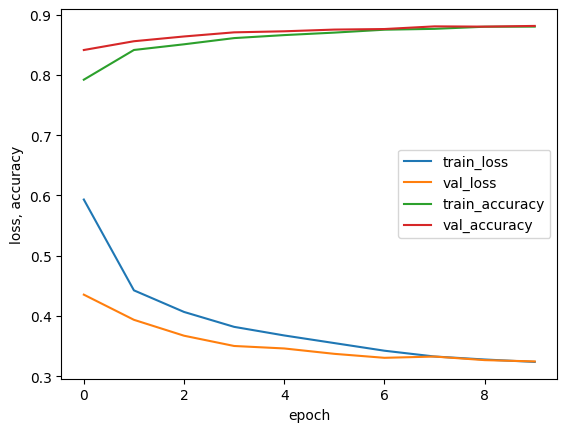

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8858 - loss: 0.3263


[0.32999423146247864, 0.8843333125114441]

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['train_loss','val_loss','train_accuracy','val_accuracy'])
plt.show()
model.evaluate(val_scaled, val_target) # 검증세트의 성능 확인 (33.10%, 87.99%) 에포크 9번
# 결론 20번을 다 돌리고 좋은 점수가 나온 9번째 에포크를 저장함.

In [48]:
# keras.callbacks.ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장해 주었음
# 여전히 20번의 에포크 동안 훈련을 함
# 사실 검증 점수가 상승하기 시작하면 그 이후에는 과대 적합이
# 더 커지기 때문에 훈련을 계속할 필요가 없음.
# 이때 훈련을 종료하면 자원과 시간일 아낄 수 있음 -> 조기종료(early stopping)

# 조기 종료는 딥러닝 분야에 많이 사용하는 기법
# 에포크의 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기도 함 - 규제방법중 하나

In [49]:
# 케라스에는 조기종료를 위한 EarlyStopping 콜백을 제공해요.
# 이 롤백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 회수로 지정해요
# patience =2 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지 (patience : 인내심)
# restore_best_weights=True >>>가장 낮은 검증 손실을 낸 모델 파라미터로 돌려요

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
# 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지 할 수 있어요
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) # 얼리

# 훈련을 중지하고 현재 모델의 파라미터를 최상의 파라미터로 되돌림
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7339 - loss: 0.7735 - val_accuracy: 0.8435 - val_loss: 0.4344
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8369 - loss: 0.4507 - val_accuracy: 0.8558 - val_loss: 0.3975
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8514 - loss: 0.4091 - val_accuracy: 0.8655 - val_loss: 0.3654
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8605 - loss: 0.3827 - val_accuracy: 0.8707 - val_loss: 0.3565
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8630 - loss: 0.3676 - val_accuracy: 0.8699 - val_loss: 0.3538
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8695 - loss: 0.3550 - val_accuracy: 0.8759 - val_loss: 0.3344
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8729 - loss: 0.3430 - val_accuracy: 0.8795 - val_loss: 0.3328
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8759 - loss: 0.3358 -

In [50]:
print(early_stopping_cb.stopped_epoch)  # 조기종료 시점 에포크

10


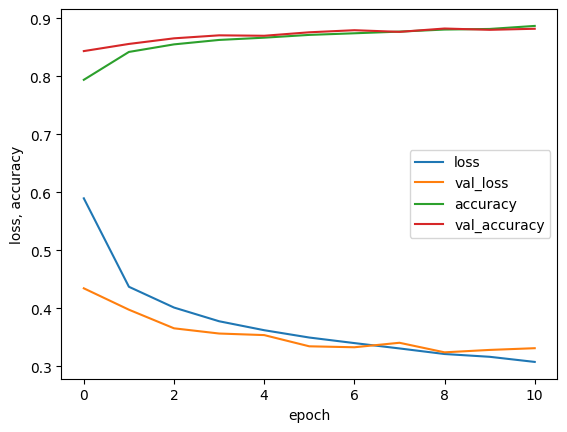

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8839 - loss: 0.3226


[0.32404300570487976, 0.8824166655540466]

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['loss', 'val_loss','accuracy', 'val_accuracy'])
plt.show()
model.evaluate(val_scaled, val_target) # 검증세트의 성능 확인 (32.49%, 88.09%) 에포크 10번
# 컴퓨터의 자원과 시간을 아끼고 콜백과 함꼐 사용하면 최상의 모델을 자동으로 저장해 준다는 것을 명심